# CLUSTERING

1. K Means Clustering
2. Hierarchial Clustering

# K Means Clustering

1. Importing the Library
2. Importing the dataset
NOTE:- This Method does not require splitting into training and test set because unlike other models it does not have the dependent variable. 
3. Using the elbow method to find the optimal number of clusters
4. Training the K Means Model on the dataset
5. Visualizing the cluster

In [1]:
#Importing the Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
# no y as there is no dependent variable it will be formed later

dataset= pd.read_csv('C:\\Users\\ebineet\\Documents\\Machine Learning\\Machine+Learning+A-Z+(Codes+and+Datasets)\\Machine Learning A-Z (Codes and Datasets)\\Part 4 - Clustering\\Section 24 - K-Means Clustering\\Python\\Mall_Customers.csv')
x = dataset.iloc[:, [3, 4]].values

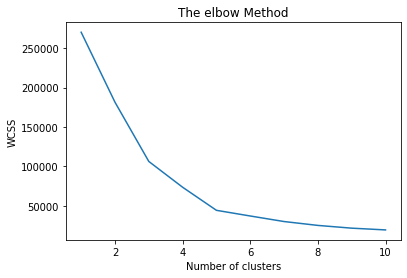

In [3]:
# Using the elbow method to find the optimal number of clusters 
# Use WCSS(within Cluster of the Squares):sum of the squared distances btwn each obsrvtion point of cluster and it's centroid
# the sum of these distances will be on the y-axis. X-> diff no. of clusters. y -> WCSS
# Kings algorithm
#to not fall into random initialization trap use "kmeans++", inertia is the attribute of kmeans++

from sklearn.cluster import KMeans
wcss = []  #list of wcss
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [4]:
# Training the K Means Model on the dataset

kmeans = KMeans(n_clusters= 5, init= 'k-means++', random_state=42)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [5]:
# Building the dependent variable. The values of this dependent variable will be 1 to 5. 1 will be cluster 1 and so on
#Each of this cluster will be certain group of customers 

kmeans = KMeans(n_clusters= 5, init= 'k-means++', random_state=42)
y_kmeans= kmeans.fit_predict(x)  ### the fit_predict methos returns the dependent variable.


In [6]:
print(y_kmeans)

## here 0 to 4 is the cluster number... like index of the 5 clusters so starting with 0
# thus the customer 1 (with custonmer id 0001) belongs to cluster 4(index 3).. and so on...

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


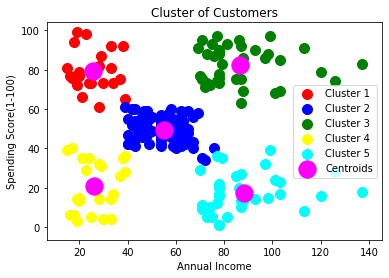

In [10]:
# Visualizing the cluster
# X Axis ---> ANUAL INCOME   Y AXIS ---> SPENDING SCORE

#plotting the plot(CLUSTERS)

plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3, 1], s=100, c='yellow', label ='Cluster 4')
plt.scatter(x[y_kmeans==4, 0], x[y_kmeans==4, 1], s=100, c='cyan', label ='Cluster 5')


#plotting the CENTROID

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='magenta', label='Centroids')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()


# HIERARCHIAL CLUSTERING

1. Importing the Library
2. Importing the dataset
NOTE:- This Method does not require splitting into training and test set because unlike other models it does not have the dependent variable. 
3. Using the dendrogram to find the optimal number of clusters
4. Training the Hierarchial Clustering Model on the dataset
5. Visualizing the cluster

In [11]:
#Importing the Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Importing the dataset
# no y as there is no dependent variable it will be formed later

dataset= pd.read_csv('C:\\Users\\ebineet\\Documents\\Machine Learning\\Machine+Learning+A-Z+(Codes+and+Datasets)\\Machine Learning A-Z (Codes and Datasets)\\Part 4 - Clustering\\Section 25 - Hierarchical Clustering\\Python\\Mall_Customers.csv')
x = dataset.iloc[:, [3, 4]].values

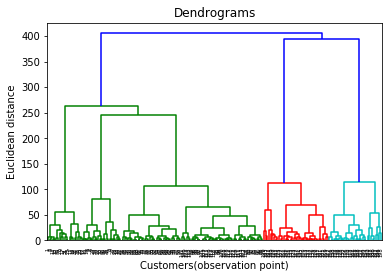

In [15]:
# Using the dendrogram to find the optimal number of clusters
#ward minimising the variance in the cluster

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendrograms')
plt.xlabel('Customers(observation point)')
plt.ylabel('Euclidean distance')
plt.show()

In [18]:
# Training the Hierarchial Clustering Model on the dataset

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters =5, affinity = 'euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

In [19]:
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


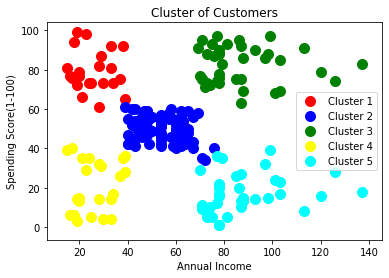

In [20]:
# Visualizing the cluster
# X Axis ---> ANUAL INCOME   Y AXIS ---> SPENDING SCORE

#plotting the plot(CLUSTERS)

plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3, 1], s=100, c='yellow', label ='Cluster 4')
plt.scatter(x[y_kmeans==4, 0], x[y_kmeans==4, 1], s=100, c='cyan', label ='Cluster 5')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()